In [186]:
import networkx as nx
import statistics
import community as community_louvain
import igraph
import leidenalg
def netgenerator1(N,Mu):
    from networkx.generators.community import LFR_benchmark_graph
    G=LFR_benchmark_graph(n=N,tau1=2,tau2=1.5,mu=Mu,average_degree=15,max_degree=50,seed=10)
    return G

def netgenerator2(N,Mu):
    from networkx.generators.community import LFR_benchmark_graph
    G=LFR_benchmark_graph(n=N,tau1=3,tau2=1.1,mu=Mu,average_degree=15,max_degree=50,seed=10)
    return G

def CNM(G):
    import networkx.algorithms.community as comudet
    com1=comudet.greedy_modularity_communities(G)
    return com1

def Louvain(G):
    import community as community_louvain
    com2 = community_louvain.best_partition(G)
    return com2

def Leiden(G):
    import igraph
    import leidenalg
    g=igraph.Graph.from_networkx(G)
    com3=leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
    return com3

def GN(G):
    import networkx as nx
    com4=nx.algorithms.community.centrality.girvan_newman(G)
    partition4=[]
    modul=[]
    for c in com4:
        partition4.append(list(c))
    for parti in partition4:
        modul.append(nx.algorithms.community.quality.modularity(G,parti))
    return partition4[modul.index(max(modul))],max(modul)

def Newman_spectral(G):
    import modularity_maximization
    import networkx as nx
    com5=modularity_maximization.partition(G)
    return com5

def partition_for_algo(com):
    import numpy as np
    partition=[]
    for i in list(np.unique(list(com.values()))):
        nodelist=[]
        for k, v in com.items() :
            if v==i:
                nodelist.append(k)
        partition.append(nodelist)
    for i in range(len(partition)):
        partition[i]=set(partition[i])
    return partition

In [217]:
modul_average1=[]
modul_variance1=[]
mu_list=[0.2,0.4,0.6]
#100
for Mu in mu_list:
    mod_CNM=[]
    mod_Louvain=[]
    mod_Leiden=[]
    G=netgenerator1(100,Mu)
    for j in range(0,50):
        com1=CNM(G)
        partition1=[set(x) for x in com1]
        mod_CNM.append(nx.algorithms.community.quality.modularity(G,partition1))
        com2=Louvain(G)
        partition2=partition_for_algo(com2)
        mod_Louvain.append(nx.algorithms.community.quality.modularity(G,partition2))
        com3=Leiden(G)
        partition3=[set(x) for x in com3]
        mod_Leiden.append(nx.algorithms.community.quality.modularity(G,partition3))


    modul_average1.append([sum(mod_CNM)/50,sum(mod_Louvain)/50,sum(mod_Leiden)/50])
    modul_variance1.append([statistics.variance(mod_CNM),statistics.variance(mod_Louvain),statistics.variance(mod_Leiden)])




In [218]:
modul_average1

[[0.31221080275750657, 0.3499021438852553, 0.35067801318148517],
 [0.1839801442016126, 0.19633125940567367, 0.20016558478021604],
 [0.14687666227846718, 0.15853768635838913, 0.16534978434024847]]

In [231]:
import networkx as nx
modul_average2=[]
modul_variance2=[]
mu_list=[0.2,0.4,0.6]
#100
for Mu in mu_list:
    mod_CNM=[]
    mod_Louvain=[]
    mod_Leiden=[]
    G=netgenerator2(100,Mu)
    for j in range(0,50):
        com1=CNM(G)
        partition1=[set(x) for x in com1]
        mod_CNM.append(nx.algorithms.community.quality.modularity(G,partition1))
        com2=Louvain(G)
        partition2=partition_for_Louvain_algo(com2)
        mod_Louvain.append(nx.algorithms.community.quality.modularity(G,partition2))
        com3=Leiden(G)
        partition3=[set(x) for x in com3]
        mod_Leiden.append(nx.algorithms.community.quality.modularity(G,partition3))

    modul_average2.append([sum(mod_CNM)/50,sum(mod_Louvain)/50,sum(mod_Leiden)/50])
    modul_variance2.append([statistics.variance(mod_CNM),statistics.variance(mod_Louvain),statistics.variance(mod_Leiden)])

In [232]:
modul_average2

[[0.2942829315206939, 0.3213379355687049, 0.32201202449454214],
 [0.1791809141797884, 0.19516908503474384, 0.19618788913383833],
 [0.16394116633739045, 0.17203764514618247, 0.17809616927126798]]

In [189]:
GN_modul1=[]
GN_modul2=[]
for Mu in mu_list:
    G=netgenerator1(100,Mu)
    GN_modul1.append(GN(G)[1])
for Mu in mu_list:
    G=netgenerator2(100,Mu)
    GN_modul2.append(GN(G)[1])

In [202]:
GN_modul1

[0.26743011540112616, 0.05132274656903485, 0.026332215161445214]

In [203]:
GN_modul2

[0.20677865258284836, 0.057153255240379265, 0.020010928020413266]

In [190]:
Newman_spectral_modul1=[]
Newman_spectral_modul2=[]
for Mu in mu_list:
    G=netgenerator1(100,Mu)
    com5=Newman_spectral(G)
    partition5=partition_for_algo(com5)
    Newman_spectral_modul1.append(nx.algorithms.community.quality.modularity(G,partition5))
for Mu in mu_list:
    G=netgenerator2(100,Mu)
    com5=Newman_spectral(G)
    partition5=partition_for_algo(com5)
    Newman_spectral_modul2.append(nx.algorithms.community.quality.modularity(G,partition5))

In [204]:
Newman_spectral_modul1

[0.3506780131814854, 0.19100154983041712, 0.1674447315309816]

In [205]:
Newman_spectral_modul2

[0.31778720502496727, 0.18987833103802185, 0.18260560612830468]

In [191]:
#CNM_running_time__netgenerator1
Mu=0.2
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 networkx.algorithms.community.greedy_modularity_communities(G)
Mu=0.4
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 networkx.algorithms.community.greedy_modularity_communities(G)
Mu=0.6
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 networkx.algorithms.community.greedy_modularity_communities(G)

60.9 ms ± 12.6 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
61.3 ms ± 13.3 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
70.7 ms ± 17.8 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [192]:
#CNM_running_time__netgenerator2
Mu=0.2
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 networkx.algorithms.community.greedy_modularity_communities(G)
Mu=0.4
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 networkx.algorithms.community.greedy_modularity_communities(G)
Mu=0.6
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 networkx.algorithms.community.greedy_modularity_communities(G)

79.1 ms ± 25.8 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
55.6 ms ± 10.7 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
55.7 ms ± 10.7 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [193]:
#Louvain_running_time__netgenerator1
Mu=0.2
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 community_louvain.best_partition(G)
Mu=0.4
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 community_louvain.best_partition(G)
Mu=0.6
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 community_louvain.best_partition(G)

25 ms ± 7.51 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
The slowest run took 4.25 times longer than the fastest. This could mean that an intermediate result is being cached.
39.5 ms ± 16.4 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
33.7 ms ± 9.22 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [194]:
#Louvain_running_time__netgenerator2
Mu=0.2
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 community_louvain.best_partition(G)
Mu=0.4
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 community_louvain.best_partition(G)
Mu=0.6
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 community_louvain.best_partition(G)

35.3 ms ± 11.1 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
32.1 ms ± 9.35 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
29.2 ms ± 8.82 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [195]:
#Leiden_running_time__netgenerator1
Mu=0.2
G=netgenerator1(100,Mu)
g=igraph.Graph.from_networkx(G)
%timeit -r 50 -n 1 leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
Mu=0.4
G=netgenerator1(100,Mu)
g=igraph.Graph.from_networkx(G)
%timeit -r 50 -n 1 leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
Mu=0.6
G=netgenerator1(100,Mu)
g=igraph.Graph.from_networkx(G)
%timeit -r 50 -n 1 leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)

1.46 ms ± 285 µs per loop (mean ± std. dev. of 50 runs, 1 loop each)
1.93 ms ± 248 µs per loop (mean ± std. dev. of 50 runs, 1 loop each)
2.49 ms ± 550 µs per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [233]:
#Leiden_running_time__netgenerator2
Mu=0.2
G=netgenerator2(100,Mu)
g=igraph.Graph.from_networkx(G)
%timeit -r 50 -n 1 leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
Mu=0.4
G=netgenerator2(100,Mu)
g=igraph.Graph.from_networkx(G)
%timeit -r 50 -n 1 leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
Mu=0.6
G=netgenerator2(100,Mu)
g=igraph.Graph.from_networkx(G)
%timeit -r 50 -n 1 leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)

1.65 ms ± 307 µs per loop (mean ± std. dev. of 50 runs, 1 loop each)
2.01 ms ± 87.7 µs per loop (mean ± std. dev. of 50 runs, 1 loop each)
2.27 ms ± 330 µs per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [ ]:
#GN_running_time__netgenerator1
Mu=0.2
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 GN(G)
Mu=0.4
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 GN(G)
Mu=0.6
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 GN(G)

In [ ]:
#GN_running_time__netgenerator2
Mu=0.2
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 GN(G)
Mu=0.4
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 GN(G)
Mu=0.6
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 GN(G)

In [183]:
#Newman_spectral_running_time__netgenerator1
Mu=0.2
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 modularity_maximization.partition(G)
Mu=0.4
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 modularity_maximization.partition(G)
Mu=0.6
G=netgenerator1(100,Mu)
%timeit -r 50 -n 1 modularity_maximization.partition(G)

16.4 s ± 738 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
29 s ± 3 s per loop (mean ± std. dev. of 50 runs, 1 loop each)
18.9 s ± 437 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [184]:
#Newman_spectral_running_time__netgenerator2
Mu=0.2
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 modularity_maximization.partition(G)
Mu=0.4
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 modularity_maximization.partition(G)
Mu=0.6
G=netgenerator2(100,Mu)
%timeit -r 50 -n 1 modularity_maximization.partition(G)

14.6 s ± 528 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
18.6 s ± 459 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)
28.4 s ± 617 ms per loop (mean ± std. dev. of 50 runs, 1 loop each)


In [228]:
import matplotlib.pyplot as plt
CNM_plot=[]
Louvain_plot=[]
Leiden_plot=[]
for i in range(0,3):
    CNM_plot.append(modul_average1[i][0])
for i in range(0,3):
    Louvain_plot.append(modul_average1[i][1])
for i in range(0,3):
    Leiden_plot.append(modul_average1[i][2])
GN_plot=GN_modul1
Newman_spectral_plot=Newman_spectral_modul1
plt.plot(mu_list, CNM_plot, label = "CNM")
plt.plot(mu_list, Louvain_plot, label = "Louvain")
plt.plot(mu_list, Leiden_plot, label = "Leiden")
plt.plot(mu_list, GN_plot, label = "GN")
plt.plot(mu_list, Newman_spectral_plot, label = "Newman_spectral")
plt.xlabel('mu')
plt.ylabel('Modularity')
plt.legend()
plt.show()

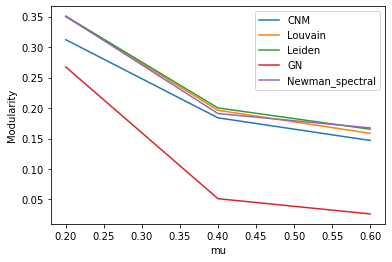

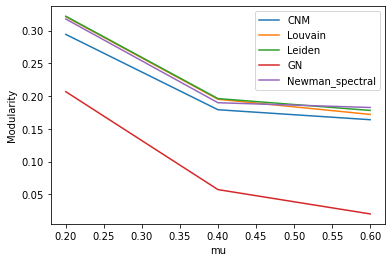

In [234]:
import matplotlib.pyplot as plt
CNM_plot=[]
Louvain_plot=[]
Leiden_plot=[]
for i in range(0,3):
    CNM_plot.append(modul_average2[i][0])
for i in range(0,3):
    Louvain_plot.append(modul_average2[i][1])
for i in range(0,3):
    Leiden_plot.append(modul_average2[i][2])
GN_plot=GN_modul2
Newman_spectral_plot=Newman_spectral_modul2
plt.plot(mu_list, CNM_plot, label = "CNM")
plt.plot(mu_list, Louvain_plot, label = "Louvain")
plt.plot(mu_list, Leiden_plot, label = "Leiden")
plt.plot(mu_list, GN_plot, label = "GN")
plt.plot(mu_list, Newman_spectral_plot, label = "Newman_spectral")
plt.xlabel('mu')
plt.ylabel('Modularity')
plt.legend()
plt.show()